## Predictions of BTC-USD Price Using SBi-LSTM and SBi-GRU

In [1]:
# lib manipulations time
import time as tm

# load all functions
from C01_data_collection import *
from C02_visualization import * 
from C03_preprocessing import *
from C04_model_predictions import *
from C05_model_evaluate import *

- config models

In [2]:
# set random number
import random as rm
rm.seed(1234)

# set random number
import numpy as np
np.random.seed(1234)

# set random number
import tensorflow as tf
tf.random.set_seed(1234)

### 1. Data Collections

In [3]:
# load dataset
dataset = data_collection("BTC-USD.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3408 entries, 0 to 3407
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3408 non-null   datetime64[ns]
 1   Open    3408 non-null   float64       
 2   High    3408 non-null   float64       
 3   Low     3408 non-null   float64       
 4   Close   3408 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 133.2 KB


In [4]:
# show dataset
print(dataset.tail())

           Date          Open          High           Low         Close
3403 2024-04-26  64485.371094  64789.656250  63322.398438  63755.320313
3404 2024-04-27  63750.988281  63898.363281  62424.718750  63419.140625
3405 2024-04-28  63423.515625  64321.484375  62793.597656  63113.230469
3406 2024-04-29  63106.363281  64174.878906  61795.457031  63841.121094
3407 2024-04-30  63839.417969  64703.332031  59120.066406  60636.855469


### 2. Exploration Data Analysis

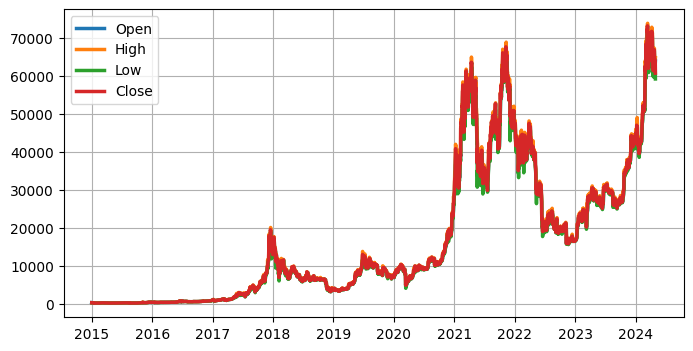

In [5]:
timeseries_matplotlib(dataset, ["Open", "High", "Low", "Close"])

### 3. Data Preprocessing

In [6]:
# call func preprocessing
scaler, scaled, x_train, y_train, x_test, y_test = preprocessing(dataset)

In [7]:
# check results
print(x_train.shape, y_train.shape)

(2666, 60, 1) (2666,)


In [8]:
# check results
print(x_test.shape, y_test.shape)

(622, 60, 1) (622,)


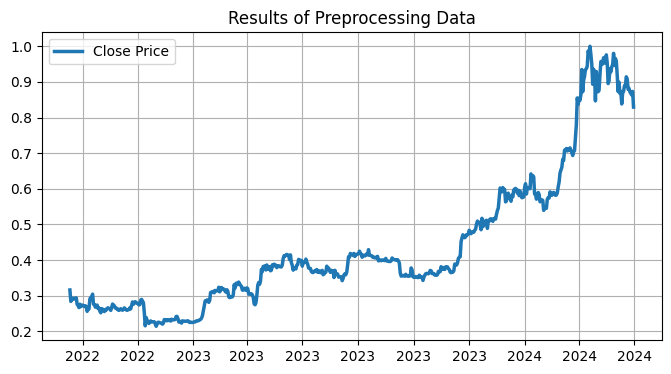

In [9]:
# results preprocessing data
lineplot_matplotlib1(
  x=dataset[["Date"]].iloc[len(y_train)+120:], y=y_test, label="Close Price", title="Results of Preprocessing Data",
)

### 4 Model Predictions

#### 4.1 Algorithms SBi-LSTM-RNN

- training models

In [10]:
# measuring execution time
start_time = tm.time()

# set algorithms
algorithms = "SBi-LSTM-RNN"

# results predictions
history, predictions = get_models(algorithms, x_train, y_train, x_test, y_test)

# measuring execution time
end_time = tm.time()

# calculating the total execution time
execution_time = end_time - start_time

Epoch 1/50
167/167 [==============================] - 15s 36ms/step - loss: 0.0037 - val_loss: 0.0045
Epoch 2/50
167/167 [==============================] - 5s 30ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 3/50
167/167 [==============================] - 5s 29ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 4/50
167/167 [==============================] - 5s 31ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 5/50
167/167 [==============================] - 5s 31ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 6/50
167/167 [==============================] - 5s 30ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/50
167/167 [==============================] - 5s 29ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 8/50
167/167 [==============================] - 5s 30ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/50
167/167 [==============================] - 5s 27ms/step - loss: 0.0010 - val_loss: 9.7203e-04
Epoch 10/50
167/167 [==============================] - 4s 24ms/step - loss: 8.1774e-04

- loss function

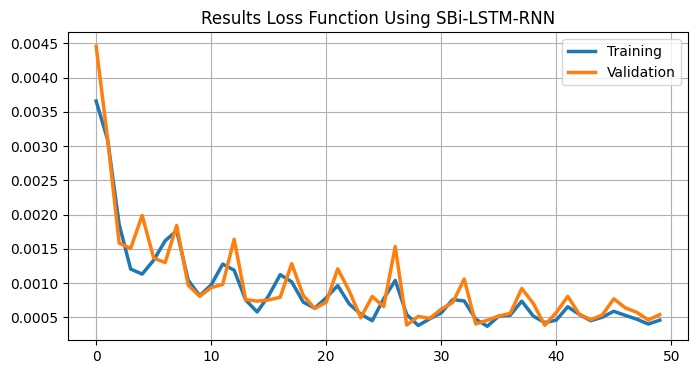

In [11]:
# show loss function
lineplot_matplotlib3(
  title="Results Loss Function Using SBi-LSTM-RNN",
  x1=history.epoch, y1=history.history['loss'], label1="Training",
  x2=history.epoch, y2=history.history['val_loss'], label2="Validation",
)

- results predictions

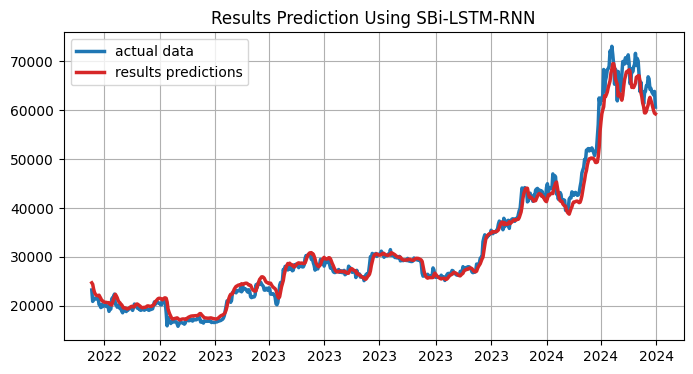

In [12]:
# show predictions
lineplot_matplotlib2(
  title="Results Prediction Using SBi-LSTM-RNN",
  x1=dataset[["Date"]].iloc[len(y_train)+120:], y1=inverse(scaler=scaler,scaled=y_test), label1="actual data",
  x2=dataset[["Date"]].iloc[len(y_train)+120:], y2=inverse(scaler=scaler,scaled=predictions), label2="results predictions",
)

In [13]:
# calculate eror
r, p_value, mae, rmse, mape = evaluate_models(
  inverse(scaler=scaler,scaled=y_test),
  inverse(scaler=scaler,scaled=predictions)
)

# show eror
print("Evaluate Models with : "+str(algorithms))
print("-------------------------------")
print("R       : "+str(r))
print("P-value : "+str(p_value))
print("MAE     : "+str(mae))
print("RMSE    : "+str(rmse))
print("MAPE    : "+str(mape))
print("Time    : "+"{:,.2f}".format(execution_time))

Evaluate Models with : SBi-LSTM-RNN
-------------------------------
R       : 0.9962
P-value : 0.0
MAE     : 1149.0899
RMSE    : 1696.9089
MAPE    : 0.0351
Time    : 225.26


#### 4.2 Algorithms SBi-GRU-RNN

- training models

In [14]:
# measuring execution time
start_time = tm.time()

# set algorithms
algorithms = "SBi-GRU-RNN"

# results predictions
history, predictions = get_models(algorithms, x_train, y_train, x_test, y_test)

# measuring execution time
end_time = tm.time()

# calculating the total execution time
execution_time = end_time - start_time

Epoch 1/50
167/167 [==============================] - 12s 32ms/step - loss: 0.0039 - val_loss: 0.0058
Epoch 2/50
167/167 [==============================] - 4s 25ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 3/50
167/167 [==============================] - 4s 25ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 4/50
167/167 [==============================] - 4s 26ms/step - loss: 9.1035e-04 - val_loss: 6.2915e-04
Epoch 5/50
167/167 [==============================] - 4s 25ms/step - loss: 6.7427e-04 - val_loss: 5.4799e-04
Epoch 6/50
167/167 [==============================] - 4s 21ms/step - loss: 6.3719e-04 - val_loss: 4.6816e-04
Epoch 7/50
167/167 [==============================] - 4s 22ms/step - loss: 6.7194e-04 - val_loss: 5.8916e-04
Epoch 8/50
167/167 [==============================] - 3s 21ms/step - loss: 0.0011 - val_loss: 7.7152e-04
Epoch 9/50
167/167 [==============================] - 4s 21ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 10/50
167/167 [==============================] -

- loss function

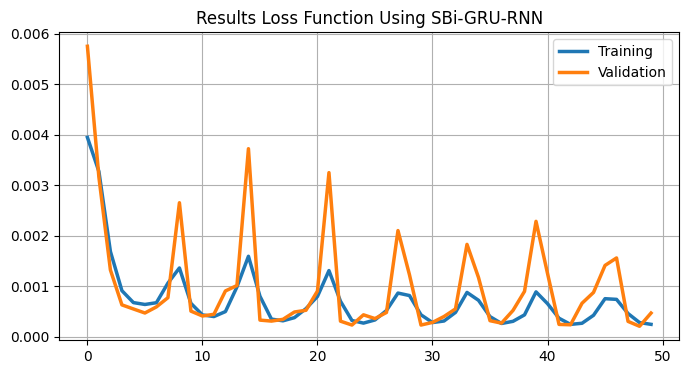

In [15]:
# show loss function
lineplot_matplotlib3(
  title="Results Loss Function Using SBi-GRU-RNN",
  x1=history.epoch, y1=history.history['loss'], label1="Training",
  x2=history.epoch, y2=history.history['val_loss'], label2="Validation",
)

- results predictions

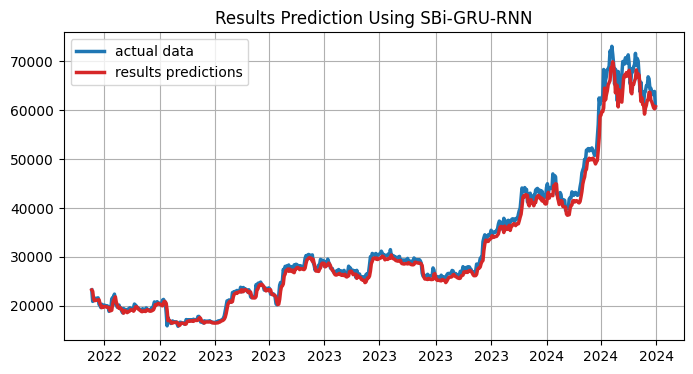

In [16]:
# show predictions
lineplot_matplotlib2(
  title="Results Prediction Using SBi-GRU-RNN",
  x1=dataset[["Date"]].iloc[len(y_train)+120:], y1=inverse(scaler=scaler,scaled=y_test), label1="actual data",
  x2=dataset[["Date"]].iloc[len(y_train)+120:], y2=inverse(scaler=scaler,scaled=predictions), label2="results predictions",
)

In [17]:
# calculate eror
r, p_value, mae, rmse, mape = evaluate_models(
  inverse(scaler=scaler,scaled=y_test),
  inverse(scaler=scaler,scaled=predictions)
)

# show eror
print("Evaluate Models with : "+str(algorithms))
print("-------------------------------")
print("R       : "+str(r))
print("P-value : "+str(p_value))
print("MAE     : "+str(mae))
print("RMSE    : "+str(rmse))
print("MAPE    : "+str(mape))
print("Time    : "+"{:,.2f}".format(execution_time))

Evaluate Models with : SBi-GRU-RNN
-------------------------------
R       : 0.9975
P-value : 0.0
MAE     : 1077.1727
RMSE    : 1575.3592
MAPE    : 0.0299
Time    : 191.91
